In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
Q_amount = []
# Q_uniques = []
Q_W_amount = []
trash = 0
for i in range(8):
    Q_W_amount.append([])
P_amount = []
permutations_amount = []
for i in range(3, 11):
    data = pd.read_csv(f'results/results_{i}.csv', delimiter=';')
    permutations_amount.append(len(data["W"]))
#     experiment 1: count unique Q-tableaux
    Q = set(data["Q"])
    Q_amount.append(len(Q))
#     experiment 2: amount of perms for each Q
    trash, Q_W_amount[i-3] = np.unique(data["Q"], return_counts=True)

In [4]:
Q_amount

[4, 10, 26, 76, 232, 764, 2620, 9496]

In [5]:
Q_W_amount[2]

array([1, 4, 4, 5, 6, 4, 5, 6, 5, 6, 5, 5, 4, 4, 5, 6, 5, 6, 5, 5, 4, 6,
       5, 4, 4, 1], dtype=int64)

[1, 2, 6, 16, 50, 156, 532, 1856, 6876]

In [69]:
x = np.arange(3, 11, 1)
y = np.array(Q_amount)
labels = "Кол-во уникальных Q"

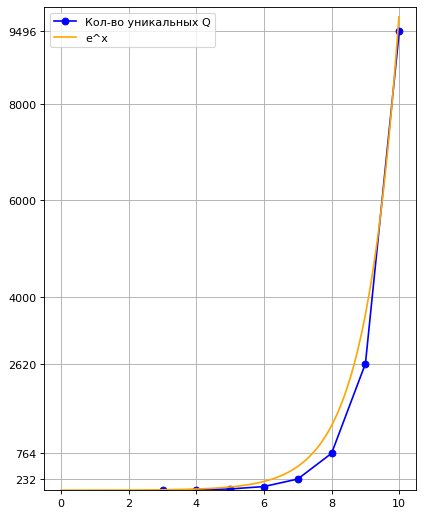

In [74]:
plt.figure(figsize=(6, 8), dpi=80)
plt.ylim(0, 10000)
plt.plot(x, y, 'o-', label=labels, color="blue")
plt.legend(loc='upper left')
x1 = np.arange(0, 10, 0.01)
def f(x):
    return math.exp(x)
f2 = np.vectorize(f)
plt.plot(x1, f2(x1 - 0.8), label="e^x", color="orange")
plt.legend(loc='upper left')
plt.grid()
plt.grid(True)
plt.yticks([y[-4], y[-3], y[-2], 4000, 6000, 8000, y[-1]])
plt.savefig("Q_tableaux.png", dpi=80)

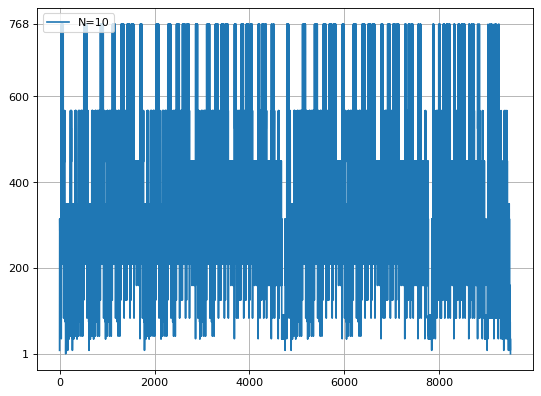

In [112]:
y = [Q_W_amount[i] for i in range(8)]
plt.figure(figsize=(8, 6), dpi=80)
for i in range(7, 8):
    x = np.array([i+1 for i in range(len(y[i]))])
    plt.yticks([max(y[i]), 1, 200, 400, 600, 900])
    plt.plot(x, y[i], '-', label=f'N={i+3}')
    plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("Q_amounts_10.png", dpi=80)

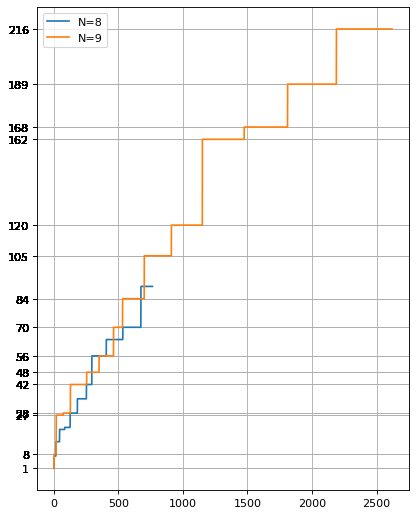

In [100]:
y = [np.sort(Q_W_amount[i]) for i in range(8)]
plt.figure(figsize=(6, 8), dpi=80)
for i in range(5, 7):
    x = np.array([i+1 for i in range(len(y[i]))])
    plt.yticks(y[i])
    plt.plot(x, y[i], '-', label=f'N={i+3}')
    plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("Q_amounts_8-9_sorted.png", dpi=80)